In [1]:
install.packages("rvest")
library(rvest)
library(tidyverse)

install.packages("reshape2")
library(reshape2)
library(ggplot2)
library(dplyr)

also installing the dependencies 'lifecycle', 'rlang'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
lifecycle  1.0.0  1.0.1             FALSE
rvest      1.0.0  1.0.1             FALSE

package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpYD2spE\downloaded_packages


installing the source packages 'lifecycle', 'rvest'

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()


package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpYD2spE\downloaded_packages


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [2]:
library(purrr)

In [3]:
life_expectancy <- "Life expectancy at birth (years).csv" %>%
  read_csv(col_types = cols(
      HDI = col_double()
      )
  )


Warning message:
"2 parsing failures.
row col expected actual                                   file
141 HDI a double     .. 'Life expectancy at birth (years).csv'
156 HDI a double     .. 'Life expectancy at birth (years).csv'
"

In [4]:
life_expectancy[1,]

HDI,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
169,Afghanistan,50.3,51,51.6,52.3,52.8,53.4,53.9,54.4,...,61,61.6,62.1,62.5,63,63.4,63.8,64.1,64.5,64.8


In [5]:
for(i in 1:191) {
    now_life_df <- life_expectancy[i,]
    now_life_df$mean_life <- rowMeans(now_life_df[3:32])
    if(i == 1) {
        life_df <- now_life_df
        } else{
        life_df <- rbind(life_df, now_life_df)
    }

}


In [6]:
life_df <- life_df %>%
    arrange(desc(mean_life)) %>% 
    na.omit()

In [7]:
write.csv(life_df,"life_df.csv" )

In [8]:
life_df <- read.csv("life_df.csv")

In [9]:
life_df

X,HDI,Country,X1990,X1991,X1992,X1993,X1994,X1995,X1996,...,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,mean_life
1,19,Japan,79.0,79.2,79.4,79.5,79.7,79.9,80.2,...,83.1,83.3,83.5,83.7,83.9,84.1,84.3,84.5,84.6,81.93333
2,4,"Hong Kong, China (SAR)",77.5,77.7,78.0,78.3,78.6,79.0,79.4,...,83.1,83.3,83.6,83.8,84.0,84.3,84.5,84.7,84.9,81.53000
3,2,Switzerland,77.6,77.7,77.9,78.1,78.3,78.5,78.8,...,82.5,82.6,82.8,83.0,83.1,83.3,83.5,83.6,83.8,80.85333
4,4,Iceland,78.1,78.2,78.4,78.5,78.6,78.8,78.9,...,82.0,82.1,82.2,82.4,82.5,82.6,82.7,82.9,83.0,80.69333
5,8,Australia,76.9,77.2,77.5,77.8,78.0,78.3,78.5,...,82.1,82.3,82.5,82.6,82.8,83.0,83.1,83.3,83.4,80.54000
6,29,Italy,76.9,77.2,77.4,77.6,77.9,78.1,78.4,...,82.1,82.3,82.5,82.6,82.8,83.0,83.2,83.4,83.5,80.52000
7,25,Spain,77.2,77.4,77.6,77.7,78.0,78.2,78.4,...,82.1,82.4,82.6,82.8,83.0,83.1,83.3,83.4,83.6,80.46000
8,7,Sweden,77.6,77.8,78.1,78.3,78.5,78.7,79.0,...,81.7,81.8,82.0,82.1,82.3,82.4,82.5,82.7,82.8,80.44000
9,16,Canada,77.3,77.5,77.7,77.8,78.0,78.2,78.3,...,81.5,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,80.04333
10,26,France,76.8,77.0,77.2,77.5,77.7,77.9,78.1,...,81.7,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.7,80.02667


In [10]:
life_df <- select(life_df, X, Country)

In [11]:
colnames(life_df)[1] <- 'Life_Rank'

In [12]:
life_df

Life_Rank,Country
1,Japan
2,"Hong Kong, China (SAR)"
3,Switzerland
4,Iceland
5,Australia
6,Italy
7,Spain
8,Sweden
9,Canada
10,France


# Economic aspect

## GDP per capita

In [14]:
GDP_df <- read_csv('GDP per capita (2017 PPP $).csv')
GDP_df <- inner_join(life_df,GDP_df, by='Country')
GDP_df <- subset(GDP_df, select = -c(HDI))
GDP_df <- subset(GDP_df, select = -c(...17))
GDP_df <- subset(GDP_df, select = -c(Life_Rank.y))

Warning message:
"Missing column names filled in: 'X17' [17]"Parsed with column specification:
cols(
  HDI = col_character(),
  Country = col_character(),
  `1990` = col_character(),
  `1995` = col_character(),
  `2000` = col_character(),
  `2005` = col_character(),
  `2010` = col_character(),
  `2011` = col_character(),
  `2012` = col_character(),
  `2013` = col_character(),
  `2014` = col_character(),
  `2015` = col_character(),
  `2016` = col_character(),
  `2017` = col_character(),
  `2018` = col_character(),
  `2019` = col_character(),
  X17 = col_character()
)
Warning message:
"Column `Country` joining factor and character vector, coercing into character vector"

ERROR: Error in eval(substitute(select), nl, parent.frame()): 找不到对象'...17'


In [15]:
GDP_df

Life_Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,X17
1,Japan,32069,34001,35518,37391,37487,37513,38135,38954,39152,39673,39926,40859,41074,41429,NA
2,"Hong Kong, China (SAR)",28798,34546,36317,43690,51361,53473,53785,55231,56359,57216,58096,59849,61072,59893,NA
3,Switzerland,55609,53388,58604,60905,64479,64845,64806,65251,66039,66162,66571,67139,68479,68628,NA
4,Iceland,34361,33169,40780,47496,46832,47567,47928,49440,49911,51739,54408,55562,56158,55874,NA
5,Australia,31309,33212,38652,42557,45354,45830,46802,47192,47671,48020,48586,48905,49576,49756,NA
6,Italy,36765,39138,43265,44477,42873,43102,41705,40465,40094,40445,41038,41785,42198,42413,NA
7,Spain,27598,29100,34826,38038,37393,36957,35840,35442,36040,37451,38554,39576,40329,40883,NA
8,Sweden,34677,34755,41244,46132,48519,49693,49036,49200,50009,51705,52116,52739,53146,53205,NA
9,Canada,32036,32950,37389,42267,45096,46062,46367,46949,47813,47770,47706,48634,48924,49031,NA
10,France,33894,35346,39923,41843,42350,43069,42996,43021,43227,43553,43914,44827,45561,46184,NA


In [16]:
highest <- c(1:10) # Most developed countries (1-10)
high <- c(42:54) # 75 Percentile (42-51)
middle <- c(91:100) # 50 Percentile (91-100)
low <- c(138:147) # 25 Percentile (138-147)
lowest <-c(179:188) # Least developted countries (180-189)

In [17]:
life_time_highest <- subset(GDP_df, Life_Rank %in% highest)
life_time_highest$Life_Rank <- '1'

life_time_high <- subset(GDP_df, Life_Rank %in% high)
life_time_high$Life_Rank <- '2'

life_time_middle <- subset(GDP_df, Life_Rank %in% middle)
life_time_middle$Life_Rank <- '3'

life_time_low <- subset(GDP_df, Life_Rank %in% low)
life_time_low$Life_Rank <- '4'

life_time_lowest <- subset(GDP_df, Life_Rank %in% lowest)
life_time_lowest$Life_Rank <- '5'

In [18]:
life_time_df <- rbind(life_time_highest, life_time_high, life_time_middle, life_time_low, life_time_lowest) 

In [19]:
life_time_df

,Life_Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,X17
1,1,Japan,32069,34001,35518,37391,37487,37513,38135,38954,39152,39673,39926,40859,41074,41429,NA
2,1,"Hong Kong, China (SAR)",28798,34546,36317,43690,51361,53473,53785,55231,56359,57216,58096,59849,61072,59893,NA
3,1,Switzerland,55609,53388,58604,60905,64479,64845,64806,65251,66039,66162,66571,67139,68479,68628,NA
4,1,Iceland,34361,33169,40780,47496,46832,47567,47928,49440,49911,51739,54408,55562,56158,55874,NA
5,1,Australia,31309,33212,38652,42557,45354,45830,46802,47192,47671,48020,48586,48905,49576,49756,NA
6,1,Italy,36765,39138,43265,44477,42873,43102,41705,40465,40094,40445,41038,41785,42198,42413,NA
7,1,Spain,27598,29100,34826,38038,37393,36957,35840,35442,36040,37451,38554,39576,40329,40883,NA
8,1,Sweden,34677,34755,41244,46132,48519,49693,49036,49200,50009,51705,52116,52739,53146,53205,NA
9,1,Canada,32036,32950,37389,42267,45096,46062,46367,46949,47813,47770,47706,48634,48924,49031,NA
10,1,France,33894,35346,39923,41843,42350,43069,42996,43021,43227,43553,43914,44827,45561,46184,NA


In [20]:
convert_to_long <- function(data) {
    gather(data, Year, Factor, -Life_Rank, -Country) %>%
    transform(Year = as.numeric(Year), Factor = as.numeric(Factor), check.names=FALSE) %>%
    na.omit() 
}

In [21]:
life_time_df <- convert_to_long(life_time_df) %>% rename(GDP_ppp = Factor)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"强制改变过程中产生了NA"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"强制改变过程中产生了NA"

In [22]:
life_time_df

,Life_Rank,Country,Year,GDP_ppp
1,1,Japan,1990,32069
2,1,"Hong Kong, China (SAR)",1990,28798
3,1,Switzerland,1990,55609
4,1,Iceland,1990,34361
5,1,Australia,1990,31309
6,1,Italy,1990,36765
7,1,Spain,1990,27598
8,1,Sweden,1990,34677
9,1,Canada,1990,32036
10,1,France,1990,33894


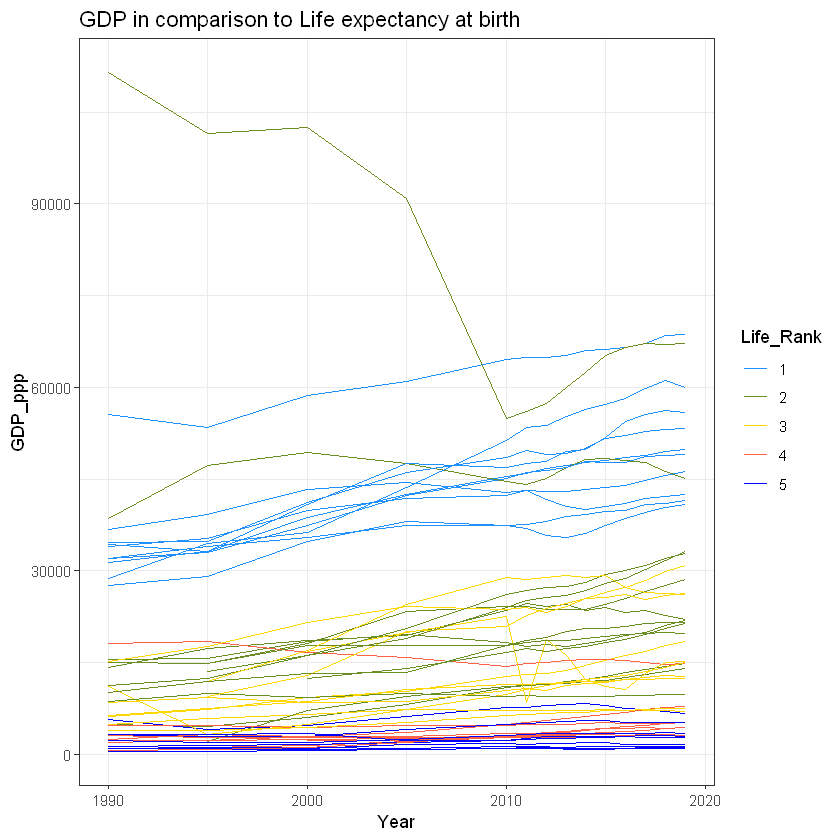

In [23]:
ggplot() +
    geom_line(data = life_time_df, aes(x=Year, y=GDP_ppp, group=Country, color=Life_Rank)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato','blue')) + theme_bw() + 
    ggtitle('GDP in comparison to Life expectancy at birth') + xlab('Year') + ylab('GDP_ppp')

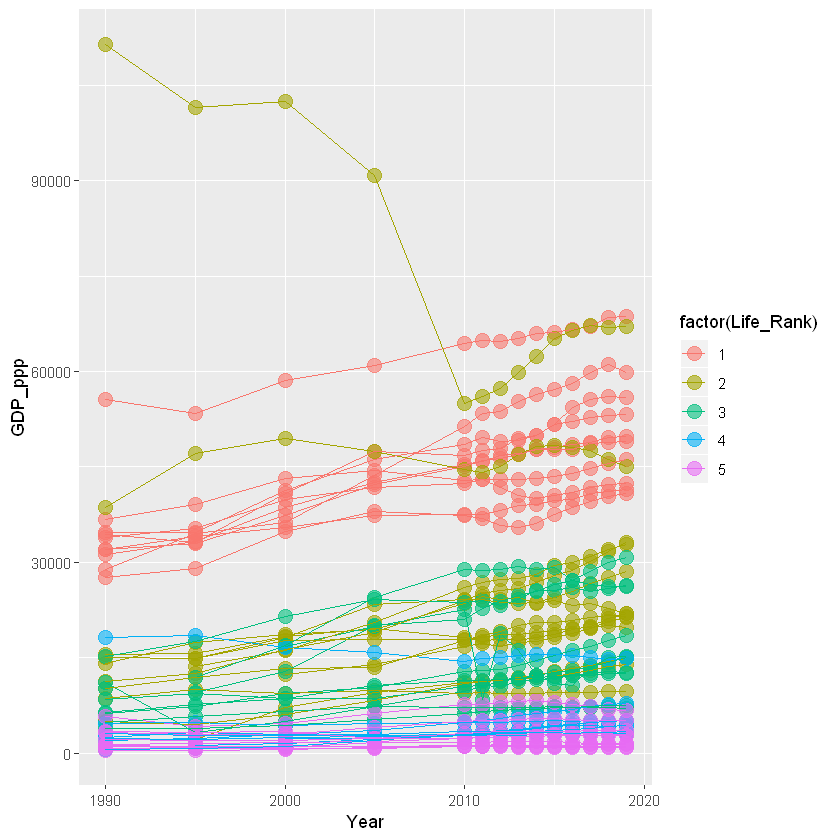

In [24]:
life_time_df %>%
group_by(Country) %>%
    ggplot(mapping = aes(x = Year, y = GDP_ppp, color = factor(Life_Rank)))+ geom_point(alpha = 0.6, size = 4)+
geom_line(data = life_time_df, aes(x=Year, y=GDP_ppp, group=Country, color=Life_Rank))

In [25]:
GDPgrouped <- life_time_df %>% 
        group_by(Life_Rank, Year) %>% 
        summarise(GDP_ppp = mean(GDP_ppp))

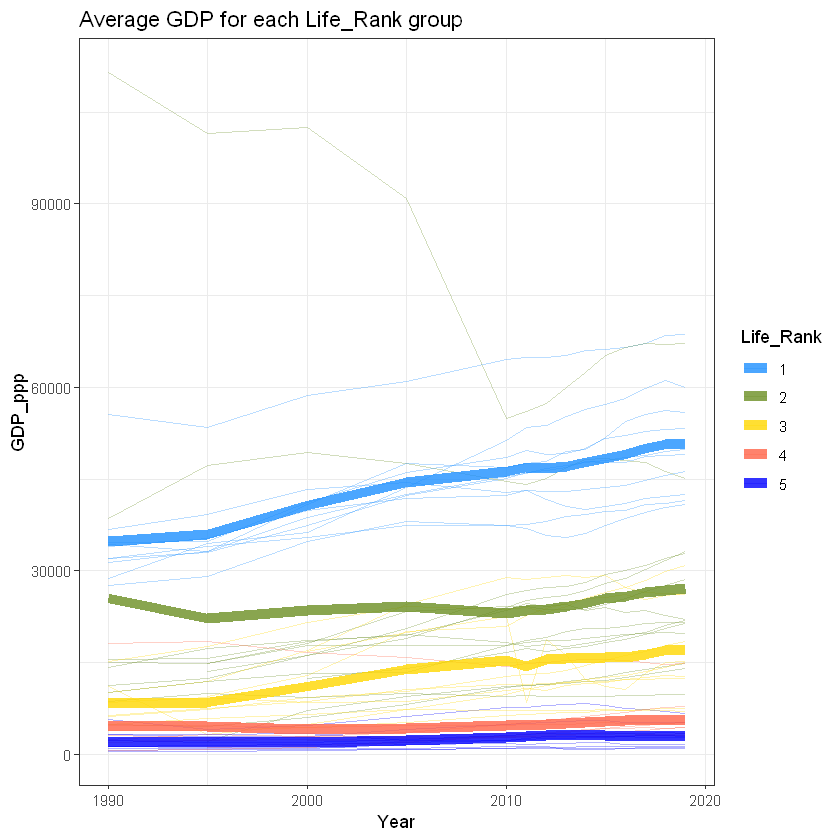

In [26]:
ggplot(life_time_df, aes(x = Year, y = GDP_ppp, color = Life_Rank)) +
    geom_line(aes(group = Country), alpha = .3) + 
    geom_line(data = GDPgrouped, alpha = .8, size = 3) + 
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato', 'blue')) +
    theme_bw() + ggtitle('Average GDP for each Life_Rank group') +
    xlab('Year') + ylab('GDP_ppp')

## Unemployment rate

In [27]:
Unemployment_df <- read_csv('Unemployment, total (% of labour force).csv')

Warning message:
"Missing column names filled in: 'X17' [17]"Parsed with column specification:
cols(
  HDI = col_character(),
  Country = col_character(),
  `1991` = col_character(),
  `1995` = col_character(),
  `2000` = col_character(),
  `2005` = col_character(),
  `2010` = col_character(),
  `2011` = col_character(),
  `2012` = col_character(),
  `2013` = col_character(),
  `2014` = col_character(),
  `2015` = col_character(),
  `2016` = col_character(),
  `2017` = col_character(),
  `2018` = col_character(),
  `2019` = col_character(),
  X17 = col_character()
)


In [28]:
Unemployment_df <- inner_join(life_df,Unemployment_df, by='Country')

Warning message:
"Column `Country` joining factor and character vector, coercing into character vector"

In [29]:
Unemployment_df <- subset(Unemployment_df, select = -c(HDI))

In [30]:
Unemployment_df <- subset(Unemployment_df, select = -c(...17))

ERROR: Error in eval(substitute(select), nl, parent.frame()): 找不到对象'...17'


In [31]:
Unemployment_df

Life_Rank,Country,1991,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,X17
1,Japan,2.1,3.2,4.7,4.4,5.1,4.5,4.3,4,3.6,3.4,3.1,2.8,2.4,2.3,a
2,"Hong Kong, China (SAR)",1.8,3.2,4.9,5.6,4.3,3.4,3.3,3.4,3.3,3.3,3.4,3.1,2.9,3.6,a
3,Switzerland,1.8,3.3,2.7,4.4,4.8,4.4,4.5,4.7,4.8,4.8,4.9,4.8,4.7,4.6,a
4,Iceland,2.5,5.2,1.9,2.5,7.6,7,6,5.4,4.9,4,3,2.7,2.7,2.8,a
5,Australia,9.6,8.5,6.3,5,5.2,5.1,5.2,5.7,6.1,6.1,5.7,5.6,5.3,5.3,a
6,Italy,10.1,11.7,10.8,7.7,8.4,8.4,10.7,12.1,12.7,11.9,11.7,11.2,10.6,9.9,a
7,Spain,15.9,22.7,13.8,9.1,19.9,21.4,24.8,26.1,24.4,22.1,19.6,17.2,15.3,14,a
8,Sweden,3.2,8.9,5.5,7.5,8.6,7.8,8,8.1,8,7.4,7,6.7,6.3,6.5,a
9,Canada,10.3,9.5,6.8,6.8,8.1,7.5,7.3,7.1,6.9,6.9,7,6.3,5.8,5.6,a
10,France,9.1,11.8,10.2,8.5,8.9,8.8,9.4,9.9,10.3,10.4,10.1,9.4,9.1,8.4,a


In [32]:
highest <- c(1:10) 
high <- c(42:54) 
middle <- c(91:100) 
low <- c(138:147) 
lowest <-c(180:189) 

In [33]:
# Create dataframe for each set of HDI indexes
life_time_highest <- subset(Unemployment_df, Life_Rank %in% highest)
life_time_highest$Life_Rank <- '1'

life_time_high <- subset(Unemployment_df, Life_Rank %in% high)
life_time_high$Life_Rank <- '2'

life_time_middle <- subset(Unemployment_df, Life_Rank %in% middle)
life_time_middle$Life_Rank <- '3'

life_time_low <- subset(Unemployment_df, Life_Rank %in% low)
life_time_low$Life_Rank <- '4'

life_time_lowest <- subset(Unemployment_df, Life_Rank %in% lowest)
life_time_lowest$Life_Rank <- '5'

life_time_df <- rbind(life_time_highest, life_time_high, life_time_middle, life_time_low, life_time_lowest) 

life_time_df <- convert_to_long(life_time_df) %>% rename(Unemployment_df = Factor)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"强制改变过程中产生了NA"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"强制改变过程中产生了NA"

In [34]:
life_time_df

,Life_Rank,Country,Year,Unemployment_df
1,1,Japan,1991,2.1
2,1,"Hong Kong, China (SAR)",1991,1.8
3,1,Switzerland,1991,1.8
4,1,Iceland,1991,2.5
5,1,Australia,1991,9.6
6,1,Italy,1991,10.1
7,1,Spain,1991,15.9
8,1,Sweden,1991,3.2
9,1,Canada,1991,10.3
10,1,France,1991,9.1


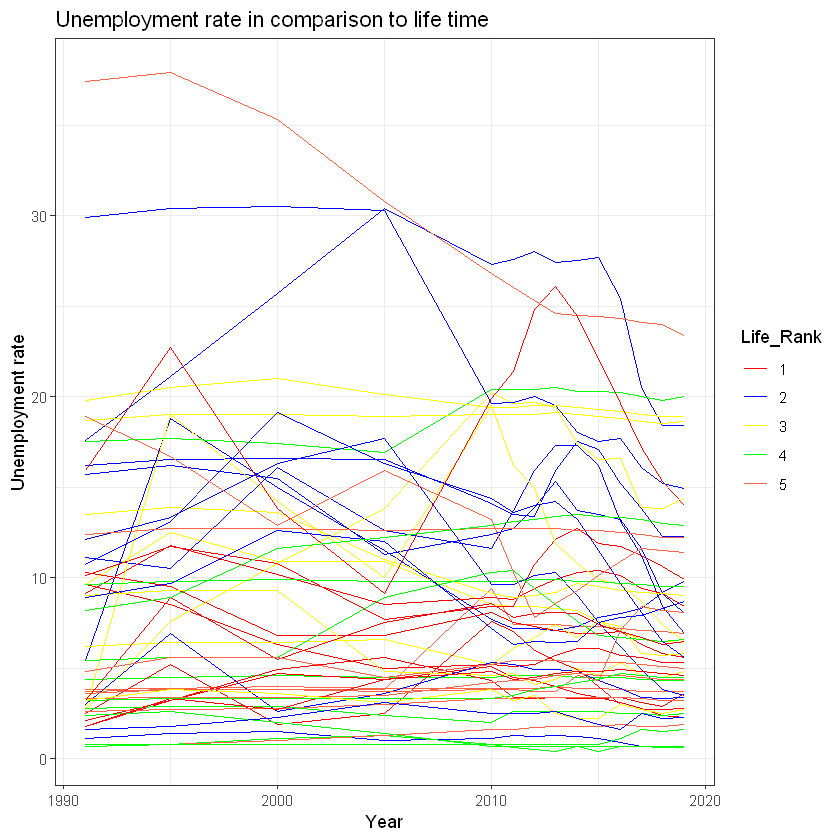

In [35]:
ggplot() +
    geom_line(data = life_time_df, aes(x=Year, y=Unemployment_df, group=Country, color=Life_Rank)) +
    scale_color_manual(values = c('red', 'blue', 'yellow', 'green','tomato')) + theme_bw() + 
    ggtitle('Unemployment rate in comparison to life time') + xlab('Year') + ylab('Unemployment rate')

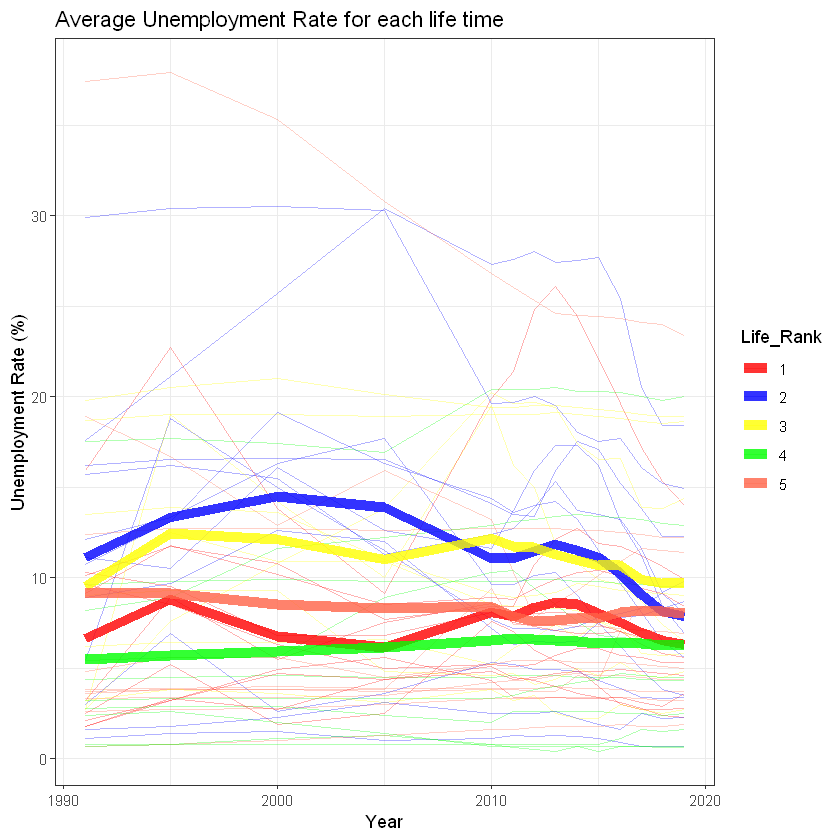

In [36]:
unemploymentgrouped <- life_time_df %>% 
        group_by(Life_Rank, Year) %>% 
        summarise(Unemployment_df = mean(Unemployment_df))

ggplot(life_time_df, aes(x = Year, y = Unemployment_df, color = Life_Rank)) +
    geom_line(aes(group = Country), alpha = .3) +
    geom_line(data = unemploymentgrouped, alpha = .8, size = 3) + 
    scale_color_manual(values = c('red', 'blue', 'yellow', 'green', 'tomato')) + 
    theme_bw() + ggtitle('Average Unemployment Rate for each life time') + 
    xlab('Year') + ylab('Unemployment Rate (%)') # Labels

# Education aspect

## Education index

In [37]:
Education_index <- "Education index.csv" %>%
  read_csv(col_types = cols(
      HDI = col_double()
      )
  )

In [38]:
Education_index <- inner_join(life_df,Education_index, by='Country')

Warning message:
"Column `Country` joining factor and character vector, coercing into character vector"

In [39]:
Education_index <- subset(Education_index, select = -c(HDI))

In [40]:
highest <- c(1:10) 
high <- c(42:54) 
middle <- c(91:100) 
low <- c(138:147) 
lowest <-c(179:188) 

In [41]:
life_time_highest <- subset(Education_index, Life_Rank %in% highest)
life_time_highest$Life_Rank <- '1'

life_time_high <- subset(Education_index, Life_Rank %in% high)
life_time_high$Life_Rank <- '2'

life_time_middle <- subset(Education_index, Life_Rank %in% middle)
life_time_middle$Life_Rank <- '3'

life_time_low <- subset(Education_index, Life_Rank %in% low)
life_time_low$Life_Rank <- '4'

life_time_lowest <- subset(Education_index, Life_Rank %in% lowest)
life_time_lowest$Life_Rank <- '5'

life_time_df <- rbind(life_time_highest, life_time_high, life_time_middle, life_time_low, life_time_lowest) 

life_time_df <- convert_to_long(life_time_df) %>% rename(Education_index = Factor)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"强制改变过程中产生了NA"

In [42]:
life_time_df

,Life_Rank,Country,Year,Education_index
1,1,Japan,1990,0.691
2,1,"Hong Kong, China (SAR)",1990,0.640
3,1,Switzerland,1990,0.695
4,1,Iceland,1990,0.678
5,1,Australia,1990,0.873
6,1,Italy,1990,0.599
7,1,Spain,1990,0.591
8,1,Sweden,1990,0.710
9,1,Canada,1990,0.806
10,1,France,1990,0.631


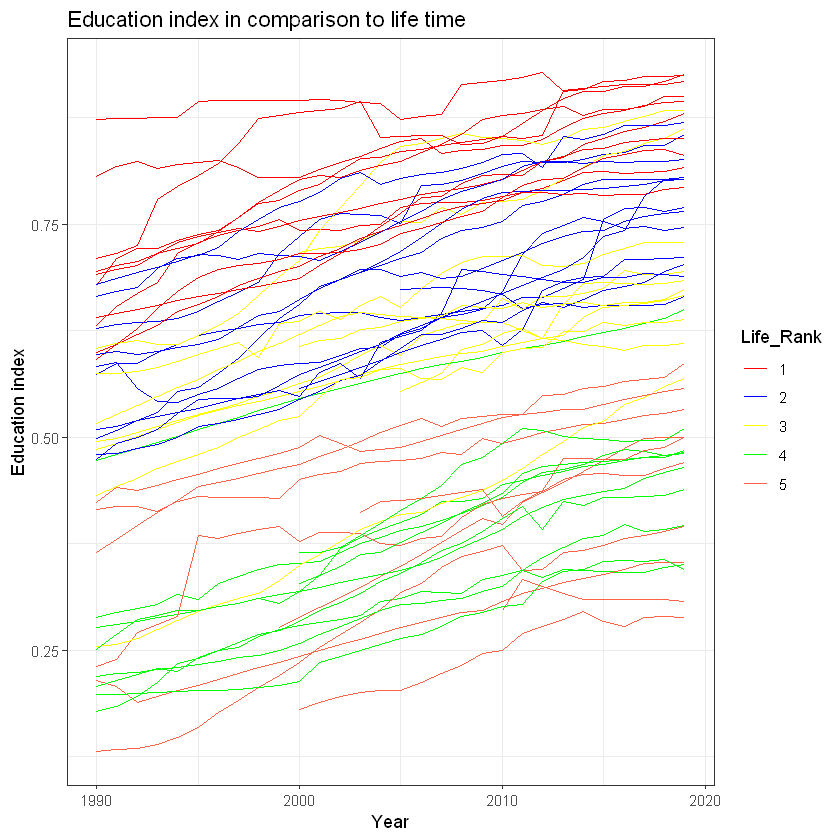

In [43]:
ggplot() +
    geom_line(data = life_time_df, aes(x=Year, y=Education_index, group=Country, color=Life_Rank)) +
    scale_color_manual(values = c('red', 'blue', 'yellow', 'green','tomato')) + theme_bw() + 
    ggtitle('Education index in comparison to life time') + xlab('Year') + ylab('Education index')

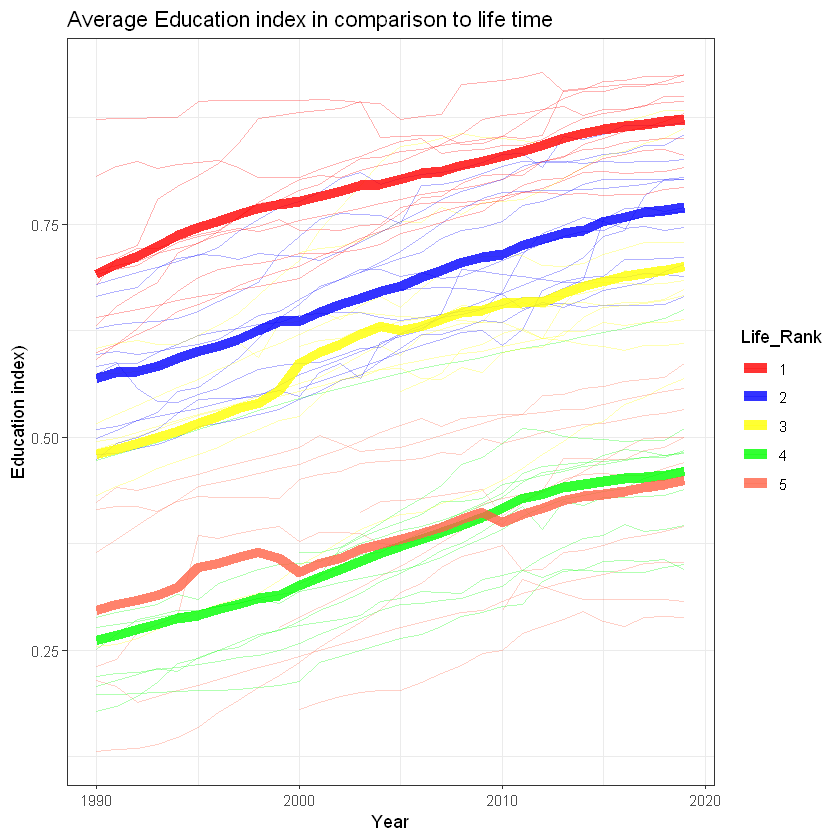

In [44]:
Education_index_group <- life_time_df %>% 
        group_by(Life_Rank, Year) %>% 
        summarise(Education_index = mean(Education_index))

ggplot(life_time_df, aes(x = Year, y = Education_index, color = Life_Rank)) +
    geom_line(aes(group = Country), alpha = .3) +
    geom_line(data = Education_index_group, alpha = .8, size = 3) + 
    scale_color_manual(values = c('red', 'blue', 'yellow', 'green', 'tomato')) + 
    theme_bw() + ggtitle('Average Education index in comparison to life time') + 
    xlab('Year') + ylab('Education index)') # Labels

## Expected years of schooling

In [ ]:
schooling_year <- read_csv('Expected years of schooling (years).csv')

In [ ]:
schooling_year <- inner_join(life_df,schooling_year, by='Country')

In [ ]:
schooling_year <- subset(schooling_year, select = -c(HDI))

In [ ]:
schooling_year

In [ ]:
highest <- c(1:10)
high <- c(42:54)
middle <- c(91:100)
low <- c(138:147)
lowest <-c(179:188)

In [ ]:
life_time_highest <- subset(schooling_year, Life_Rank %in% highest)
life_time_highest$Life_Rank <- '1'

life_time_high <- subset(schooling_year, Life_Rank %in% high)
life_time_high$Life_Rank <- '2'

life_time_middle <- subset(schooling_year, Life_Rank %in% middle)
life_time_middle$Life_Rank <- '3'

life_time_low <- subset(schooling_year, Life_Rank %in% low)
life_time_low$Life_Rank <- '4'

life_time_lowest <- subset(schooling_year, Life_Rank %in% lowest)
life_time_lowest$Life_Rank <- '5'

In [ ]:
life_time_df <- rbind(life_time_highest, life_time_high, life_time_middle, life_time_low, life_time_lowest) 

In [ ]:
life_time_df <- convert_to_long(life_time_df) %>% rename(schooling_year = Factor)

In [ ]:
life_time_df

In [ ]:
ggplot() +
    geom_line(data = life_time_df, aes(x=Year, y=schooling_year, group=Country, color=Life_Rank)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato','blue')) + theme_bw() +
    ggtitle('schooling year in comparison to life time') + xlab('Year') + ylab('schooling_year') 

In [ ]:
schooling_year_grouped <- life_time_df %>% 
        group_by(Life_Rank, Year) %>% 
        summarise(schooling_year = mean(schooling_year))


ggplot(life_time_df, aes(x = Year, y = schooling_year, color = Life_Rank)) +
    geom_line(aes(group = Country), alpha = .3) + 
    geom_line(data = schooling_year_grouped, alpha = .8, size = 3) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato', 'blue')) + 
    theme_bw() + ggtitle('Average schooling year for each life time group') + 
    xlab('Year') + ylab('schooling_year')

# Social aspect

## Vaccination rate

In [ ]:
Infants_measles <- read_csv('Infants lacking immunization, measles (% of one-year-olds).csv')

In [ ]:
Infants_measles

In [ ]:
Infants_measles <- inner_join(life_df,Infants_measles, by='Country')

In [ ]:
Infants_measles <- subset(Infants_measles, select = -c(HDI))

In [ ]:
Infants_measles

In [ ]:
highest <- c(1:10)
high <- c(42:54) 
middle <- c(91:100) 
low <- c(138:147) 
lowest <-c(179:188) 

In [ ]:
life_time_highest <- subset(Infants_measles, Life_Rank %in% highest)
life_time_highest$Life_Rank <- '1'

life_time_high <- subset(Infants_measles, Life_Rank %in% high)
life_time_high$Life_Rank <- '2'

life_time_middle <- subset(Infants_measles, Life_Rank %in% middle)
life_time_middle$Life_Rank <- '3'

life_time_low <- subset(Infants_measles, Life_Rank %in% low)
life_time_low$Life_Rank <- '4'

life_time_lowest <- subset(Infants_measles, Life_Rank %in% lowest)
life_time_lowest$Life_Rank <- '5'

In [ ]:
life_time_df <- rbind(life_time_highest, life_time_high, life_time_middle, life_time_low, life_time_lowest)

In [ ]:
life_time_df <- convert_to_long(life_time_df) %>% rename(Infants_measles = Factor)

In [ ]:
ggplot() +
    geom_line(data = life_time_df, aes(x=Year, y=Infants_measles, group=Country, color=Life_Rank)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato','blue')) + theme_bw() +
    ggtitle('Infants_lacking_immunization_measles') + xlab('Year') + ylab('lacking Infants_measles_rates')

In [ ]:
Infants_measles_grouped <- life_time_df %>% 
        group_by(Life_Rank, Year) %>% 
        summarise(Infants_measles = mean(Infants_measles))


ggplot(life_time_df, aes(x = Year, y = Infants_measles, color = Life_Rank)) +
    geom_line(aes(group = Country), alpha = .3) +
    geom_line(data = Infants_measles_grouped, alpha = .8, size = 3) + 
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato', 'blue')) + 
    theme_bw() + ggtitle('Infants_lacking_immunization_measles') + 
    xlab('Year') + ylab('lacking Infants_measles_rates') 

## HDI

In [ ]:
HDI_df <- read_csv('Human Development Index (HDI).csv')

In [ ]:
HDI_df <- inner_join(life_df,HDI_df, by='Country')

In [ ]:
HDI_df <- subset(HDI_df, select = -c(HDI))

In [ ]:
HDI_df

In [ ]:
life_time_highest <- subset(HDI_df, Life_Rank %in% highest)
life_time_highest$Life_Rank <- '1'

life_time_high <- subset(HDI_df, Life_Rank %in% high)
life_time_high$Life_Rank <- '2'

life_time_middle <- subset(HDI_df, Life_Rank %in% middle)
life_time_middle$Life_Rank <- '3'

life_time_low <- subset(HDI_df, Life_Rank %in% low)
life_time_low$Life_Rank <- '4'

life_time_lowest <- subset(HDI_df, Life_Rank %in% lowest)
life_time_lowest$Life_Rank <- '5'

In [ ]:
life_time_df <- rbind(life_time_highest, life_time_high, life_time_middle, life_time_low, life_time_lowest) 

In [ ]:
life_time_df <- convert_to_long(life_time_df) %>% rename(HDI = Factor)

In [ ]:
life_time_df

In [ ]:
ggplot() +
    geom_line(data = life_time_df, aes(x=Year, y=HDI, group=Country, color=Life_Rank)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato','blue')) + theme_bw() +
    ggtitle('HDI in comparison to life time') + xlab('Year') + ylab('HDI')

In [ ]:
HDIgrouped <- life_time_df %>% 
        group_by(Life_Rank, Year) %>% 
        summarise(HDI = mean(HDI))


ggplot(life_time_df, aes(x = Year, y = HDI, color = Life_Rank)) +
    geom_line(aes(group = Country), alpha = .3) +
    geom_line(data = HDIgrouped, alpha = .8, size = 3) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato', 'blue')) + 
    theme_bw() + ggtitle('Average HDI for each life time group') + 
    xlab('Year') + ylab('HDI')


In [2]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(xml2) # makes it easier to work with HTML and XML from R

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'glue'

The following object is masked from 'package:dplyr':

    collapse


Attaching package: 'rvest'

The following object is masked from 'package:readr':

    guess_encoding

Warning message:
"package 'xml2' was built under R version 3.6.3"

In [3]:
link_for_pollution = "https://www.numbeo.com/pollution/rankings_by_country.jsp?title=2020"
page_for_pollution <- link_for_pollution %>% read_html()

In [53]:
get_one_year_p <- function(n){
    link_for_year <- glue("https://www.numbeo.com/pollution/rankings_by_country.jsp?title={n}")
    page_of_year <- link_for_year %>% read_html()
       #get html into R
    
    #create dataframe,similar to what we do above
    node = "#t2"
    table = page_of_year %>%
      html_nodes(node)
    pollution_df = as.data.frame(table %>% html_table(fill = TRUE))
    pollution_df = pollution_df[,-c(1,4)]
    pollution_df$year <- n
    return(pollution_df)
}

In [56]:
p_total = get_one_year_p(2014)

In [57]:
for(n in 2015:2021)
    {
    tmp = get_one_year_p(n)
    p_total = rbind(p_total,tmp)
}
    



In [59]:
nrow(p_total)

[1] 890

In [60]:
#pollution index for each country fro 2014-2021
p_total

Country,Pollution.Index,year
Ghana,111.18,2014
Bangladesh,95.87,2014
Mongolia,94.98,2014
Egypt,91.23,2014
Peru,88.65,2014
Myanmar,86.93,2014
Lebanon,86.72,2014
El Salvador,86.28,2014
Iran,86.07,2014
Trinidad And Tobago,85.71,2014
